In [1]:
import pandas as pd 
import numpy as np

In [2]:
df= pd.read_csv(r"C:\Users\Kush\Desktop\Selected dataset for ML and DL\ML-EdgeIIoT-dataset.csv", low_memory= False)

In [3]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

In [22]:
from sklearn.utils import shuffle
import pandas as pd

df= pd.read_csv(r"C:\Users\Kush\Desktop\Selected dataset for ML and DL\ML-EdgeIIoT-dataset.csv", low_memory= False)

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg", "http.request.method", "http.referer", 
                
        "http.request.version", "dns.qry.name.len", "mqtt.conack.flags","mqtt.protoname", "mqtt.topic"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())
print(df['Attack_label'].value_counts())

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64
1    128095
0     24101
Name: Attack_label, dtype: int64


In [24]:
df = shuffle(df)

df.isna().sum()

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 152196 entries, 153981 to 142864
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp.opcode                 152196 non-null  float64
 1   arp.hw.size                152196 non-null  float64
 2   icmp.checksum              152196 non-null  float64
 3   icmp.seq_le                152196 non-null  float64
 4   icmp.unused                152196 non-null  float64
 5   http.content_length        152196 non-null  float64
 6   http.response              152196 non-null  float64
 7   http.tls_port              152196 non-null  float64
 8   tcp.ack                    152196 non-null  float64
 9   tcp.ack_raw                152196 non-null  float64
 10  tcp.checksum               152196 non-null  float64
 11  tcp.connection.fin         152196 non-null  float64
 12  tcp.connection.rst         152196 non-null  float64
 13  tcp.connection.syn      

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Independent features
x= df.iloc[:,:-1]
y= df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [13]:
from catboost import CatBoostClassifier

In [14]:
model= CatBoostClassifier()
model.fit(x_train,y_train)

Learning rate set to 0.101084
0:	learn: 2.0979453	total: 3.15s	remaining: 52m 23s
1:	learn: 1.8626365	total: 5.51s	remaining: 45m 50s
2:	learn: 1.7012239	total: 24.9s	remaining: 2h 17m 45s
3:	learn: 1.5871101	total: 26.3s	remaining: 1h 49m 19s
4:	learn: 1.4989652	total: 27.8s	remaining: 1h 32m 8s
5:	learn: 1.3697947	total: 29.2s	remaining: 1h 20m 33s
6:	learn: 1.3050921	total: 30.8s	remaining: 1h 12m 42s
7:	learn: 1.2346450	total: 32.3s	remaining: 1h 6m 47s
8:	learn: 1.1744948	total: 33.7s	remaining: 1h 1m 46s
9:	learn: 1.1233021	total: 35.1s	remaining: 57m 56s
10:	learn: 1.0808963	total: 36.6s	remaining: 54m 49s
11:	learn: 1.0393623	total: 38s	remaining: 52m 6s
12:	learn: 0.9977355	total: 39.3s	remaining: 49m 43s
13:	learn: 0.9488821	total: 40.8s	remaining: 47m 50s
14:	learn: 0.9220477	total: 42.2s	remaining: 46m 9s
15:	learn: 0.8879997	total: 43.6s	remaining: 44m 41s
16:	learn: 0.8493489	total: 45s	remaining: 43m 21s
17:	learn: 0.8275992	total: 46.4s	remaining: 42m 11s
18:	learn: 0.8

152:	learn: 0.2907510	total: 3m 57s	remaining: 21m 56s
153:	learn: 0.2902754	total: 3m 59s	remaining: 21m 54s
154:	learn: 0.2900055	total: 4m	remaining: 21m 51s
155:	learn: 0.2895855	total: 4m 2s	remaining: 21m 49s
156:	learn: 0.2890441	total: 4m 3s	remaining: 21m 47s
157:	learn: 0.2887655	total: 4m 4s	remaining: 21m 45s
158:	learn: 0.2881148	total: 4m 6s	remaining: 21m 42s
159:	learn: 0.2875352	total: 4m 7s	remaining: 21m 40s
160:	learn: 0.2870947	total: 4m 8s	remaining: 21m 37s
161:	learn: 0.2864315	total: 4m 10s	remaining: 21m 35s
162:	learn: 0.2860404	total: 4m 11s	remaining: 21m 33s
163:	learn: 0.2856688	total: 4m 13s	remaining: 21m 30s
164:	learn: 0.2853263	total: 4m 14s	remaining: 21m 28s
165:	learn: 0.2849511	total: 4m 15s	remaining: 21m 26s
166:	learn: 0.2847672	total: 4m 17s	remaining: 21m 23s
167:	learn: 0.2845096	total: 4m 18s	remaining: 21m 20s
168:	learn: 0.2840607	total: 4m 20s	remaining: 21m 18s
169:	learn: 0.2835406	total: 4m 21s	remaining: 21m 16s
170:	learn: 0.282992

303:	learn: 0.2610537	total: 7m 39s	remaining: 17m 33s
304:	learn: 0.2610082	total: 7m 41s	remaining: 17m 31s
305:	learn: 0.2609855	total: 7m 42s	remaining: 17m 29s
306:	learn: 0.2609710	total: 7m 44s	remaining: 17m 28s
307:	learn: 0.2609235	total: 7m 45s	remaining: 17m 26s
308:	learn: 0.2608879	total: 7m 47s	remaining: 17m 25s
309:	learn: 0.2608465	total: 7m 49s	remaining: 17m 24s
310:	learn: 0.2608312	total: 7m 50s	remaining: 17m 22s
311:	learn: 0.2607960	total: 7m 52s	remaining: 17m 21s
312:	learn: 0.2607820	total: 7m 53s	remaining: 17m 19s
313:	learn: 0.2606212	total: 7m 54s	remaining: 17m 17s
314:	learn: 0.2605931	total: 7m 56s	remaining: 17m 15s
315:	learn: 0.2605345	total: 7m 57s	remaining: 17m 13s
316:	learn: 0.2604869	total: 7m 59s	remaining: 17m 12s
317:	learn: 0.2604292	total: 8m	remaining: 17m 10s
318:	learn: 0.2603269	total: 8m 1s	remaining: 17m 8s
319:	learn: 0.2602585	total: 8m 3s	remaining: 17m 6s
320:	learn: 0.2602153	total: 8m 4s	remaining: 17m 5s
321:	learn: 0.260017

453:	learn: 0.2529171	total: 11m 7s	remaining: 13m 22s
454:	learn: 0.2529049	total: 11m 8s	remaining: 13m 21s
455:	learn: 0.2528961	total: 11m 10s	remaining: 13m 19s
456:	learn: 0.2528773	total: 11m 11s	remaining: 13m 18s
457:	learn: 0.2528681	total: 11m 12s	remaining: 13m 16s
458:	learn: 0.2528391	total: 11m 14s	remaining: 13m 14s
459:	learn: 0.2528150	total: 11m 15s	remaining: 13m 13s
460:	learn: 0.2527975	total: 11m 17s	remaining: 13m 11s
461:	learn: 0.2527765	total: 11m 18s	remaining: 13m 9s
462:	learn: 0.2527660	total: 11m 19s	remaining: 13m 8s
463:	learn: 0.2527366	total: 11m 21s	remaining: 13m 6s
464:	learn: 0.2526713	total: 11m 22s	remaining: 13m 5s
465:	learn: 0.2526479	total: 11m 23s	remaining: 13m 3s
466:	learn: 0.2525757	total: 11m 25s	remaining: 13m 1s
467:	learn: 0.2525575	total: 11m 26s	remaining: 13m
468:	learn: 0.2525436	total: 11m 27s	remaining: 12m 58s
469:	learn: 0.2525362	total: 11m 28s	remaining: 12m 56s
470:	learn: 0.2523535	total: 11m 30s	remaining: 12m 55s
471:

601:	learn: 0.2475794	total: 14m 33s	remaining: 9m 37s
602:	learn: 0.2475692	total: 14m 34s	remaining: 9m 35s
603:	learn: 0.2475570	total: 14m 35s	remaining: 9m 34s
604:	learn: 0.2475241	total: 14m 37s	remaining: 9m 32s
605:	learn: 0.2475158	total: 14m 38s	remaining: 9m 31s
606:	learn: 0.2475082	total: 14m 40s	remaining: 9m 29s
607:	learn: 0.2474866	total: 14m 41s	remaining: 9m 28s
608:	learn: 0.2474573	total: 14m 43s	remaining: 9m 26s
609:	learn: 0.2472866	total: 14m 44s	remaining: 9m 25s
610:	learn: 0.2472568	total: 14m 45s	remaining: 9m 23s
611:	learn: 0.2471629	total: 14m 46s	remaining: 9m 22s
612:	learn: 0.2471014	total: 14m 48s	remaining: 9m 20s
613:	learn: 0.2470572	total: 14m 49s	remaining: 9m 19s
614:	learn: 0.2470499	total: 14m 51s	remaining: 9m 17s
615:	learn: 0.2470372	total: 14m 52s	remaining: 9m 16s
616:	learn: 0.2470346	total: 14m 53s	remaining: 9m 14s
617:	learn: 0.2470140	total: 14m 55s	remaining: 9m 13s
618:	learn: 0.2470049	total: 14m 56s	remaining: 9m 11s
619:	learn

752:	learn: 0.2438195	total: 18m 2s	remaining: 5m 55s
753:	learn: 0.2438123	total: 18m 3s	remaining: 5m 53s
754:	learn: 0.2437881	total: 18m 5s	remaining: 5m 52s
755:	learn: 0.2437710	total: 18m 6s	remaining: 5m 50s
756:	learn: 0.2437093	total: 18m 7s	remaining: 5m 49s
757:	learn: 0.2436716	total: 18m 9s	remaining: 5m 47s
758:	learn: 0.2436536	total: 18m 10s	remaining: 5m 46s
759:	learn: 0.2436390	total: 18m 12s	remaining: 5m 44s
760:	learn: 0.2435894	total: 18m 13s	remaining: 5m 43s
761:	learn: 0.2435716	total: 18m 14s	remaining: 5m 41s
762:	learn: 0.2435492	total: 18m 16s	remaining: 5m 40s
763:	learn: 0.2435339	total: 18m 17s	remaining: 5m 39s
764:	learn: 0.2435001	total: 18m 18s	remaining: 5m 37s
765:	learn: 0.2434957	total: 18m 20s	remaining: 5m 36s
766:	learn: 0.2434882	total: 18m 21s	remaining: 5m 34s
767:	learn: 0.2434770	total: 18m 22s	remaining: 5m 33s
768:	learn: 0.2434698	total: 18m 24s	remaining: 5m 31s
769:	learn: 0.2434286	total: 18m 25s	remaining: 5m 30s
770:	learn: 0.24

903:	learn: 0.2405507	total: 21m 28s	remaining: 2m 16s
904:	learn: 0.2405254	total: 21m 30s	remaining: 2m 15s
905:	learn: 0.2405053	total: 21m 31s	remaining: 2m 14s
906:	learn: 0.2405007	total: 21m 33s	remaining: 2m 12s
907:	learn: 0.2404898	total: 21m 34s	remaining: 2m 11s
908:	learn: 0.2404849	total: 21m 35s	remaining: 2m 9s
909:	learn: 0.2404763	total: 21m 37s	remaining: 2m 8s
910:	learn: 0.2404698	total: 21m 38s	remaining: 2m 6s
911:	learn: 0.2404601	total: 21m 40s	remaining: 2m 5s
912:	learn: 0.2404526	total: 21m 41s	remaining: 2m 4s
913:	learn: 0.2404373	total: 21m 42s	remaining: 2m 2s
914:	learn: 0.2404238	total: 21m 44s	remaining: 2m 1s
915:	learn: 0.2404174	total: 21m 45s	remaining: 1m 59s
916:	learn: 0.2403989	total: 21m 46s	remaining: 1m 58s
917:	learn: 0.2403854	total: 21m 48s	remaining: 1m 56s
918:	learn: 0.2403820	total: 21m 49s	remaining: 1m 55s
919:	learn: 0.2403798	total: 21m 51s	remaining: 1m 54s
920:	learn: 0.2403441	total: 21m 52s	remaining: 1m 52s
921:	learn: 0.240

In [15]:
y_pred= model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [17]:
score= accuracy_score(y_pred, y_test)

In [18]:
score

0.9086399474375821

In [19]:
classification_report(y_pred, y_test)

'                       precision    recall  f1-score   support\n\n             Backdoor       0.93      1.00      0.96      1790\n            DDoS_HTTP       0.90      0.60      0.72      3105\n            DDoS_ICMP       1.00      1.00      1.00      2644\n             DDoS_TCP       1.00      1.00      1.00      2032\n             DDoS_UDP       1.00      1.00      1.00      2947\n       Fingerprinting       0.66      0.97      0.79       116\n                 MITM       0.98      1.00      0.99        60\n               Normal       1.00      1.00      1.00      4862\n             Password       0.82      0.76      0.79      2108\n        Port_Scanning       1.00      0.88      0.94      2051\n           Ransomware       0.88      1.00      0.93      1702\n        SQL_injection       0.75      0.78      0.77      2004\n            Uploading       0.63      0.89      0.74      1455\nVulnerability_scanner       0.95      0.99      0.97      1935\n                  XSS       0.78     

In [20]:
confusion_matrix(y_pred, y_test)

array([[1789,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0],
       [  71, 1850,    0,    0,    0,   29,    0,    0,  189,    0,  125,
         265,  400,   27,  149],
       [   0,    0, 2643,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0, 2032,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    1,    0,    0, 2943,    0,    1,    0,    0,    1,    0,
           1,    0,    0,    0],
       [   0,    0,    3,    0,    0,  113,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,   60,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4862,    0,    0,    0,
           0,    0,    0,    0],
       [   0,   71,    0,    0,    0,    0,    0,    0, 1600,    0,    0,
         169,  103,   35,  130],
       [  31,    0,    0,    0,    0,

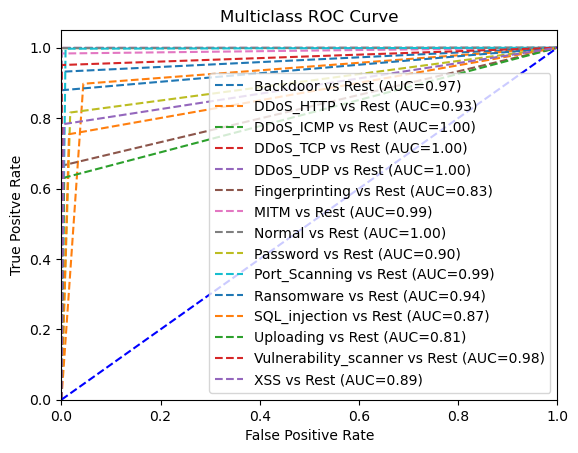

In [21]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt  

y_test_binarize= label_binarize(y_test, classes= np.unique(y_test))
y_pred_binarize= label_binarize(y_pred, classes= np.unique(y_pred))

#ROC Curve
fpr= {}
tpr= {}
thresh= {}
roc_auc= dict()
classes= np.unique(y_test)
n_class= classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarize[:,i], y_pred_binarize[:,i])
    roc_auc[i]= auc(fpr[i], tpr[i])
    
    #plotting
    plt.plot(fpr[i], tpr[i], linestyle= '--', label= '%s vs Rest (AUC=%0.2f)'% (classes[i], roc_auc[i]))
    
plt.plot([0,1], [0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.legend(loc= 'lower right')
plt.show()